In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import thinkstats2
import thinkplot
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [2]:
#Load some data. We'll use this in a bit. 
df = pd.read_csv("data/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Logistic Regression

Linear regression allows us to make numerical predictions based on one or more inputs, either numerical or categorical. Logistic regression is the equivalent that allows us to make classfication predictions - predicting if something falls into group A or group B. 

Logistic regression is based on our old friend, the logit, of log ratio fame. We effectively are doing a regression to predict the likelihood of something happening, then categorizing it based on if it is more probable than some cutoff (e.g. 50%). For example, we can calculate the probability that a transaction is fraudulent, then if it is more likely than not to be fraud, we categorize it as such. For now, we'll look at predicting between two classes, but that's not a limit, we can categorize into many classes. 

Logistic regression (and other classification methods) are extremely common. Regression/prediction and classification are the two big pillars of predictive analytics that we will look at through next term. 

## The Classification Problem

Dealing with classification is a little different than regression, because now we are not looking to predict a value, we are looking to predic a class - or phrased alternatively, we are looking to divide two (or more) sets of data.  

If we plot a simple 2 varaible problem, just like we did in linear regression, we'll get something that looks like this:
<ul>
<li> Suppose that BMI is our X and Outcome (do you have diabetes?) is the Y. 
<li> Plot that on a scatter plot. 
<li> Our goal is to use X to predict Y, just as it was in linear regression. 
<li> However, there's not a very obvious way to use the X value only to do a linear regression that has any degree of accuracy.
    <ul>
    <li> Seriously, try to generate any line of best fit that doesn't have massive residuals. 
    </ul>
</ul>

<AxesSubplot:xlabel='BMI', ylabel='Outcome'>

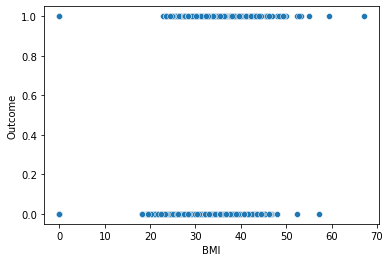

In [3]:
sns.scatterplot(data=df, x="BMI", y="Outcome")

#### So What Do We Do?

We need something that can transform our simple linear fitting into something... else. 

### Remember the Logit?

Recall from the probability stuff, we also calculated odds - or the ratio of something happening to it not happening. Odds are just an alternative expression of probability. E.g. if we are 30% likely to win a price, p = .3. We generally treat classification as splitting our data into 1 and 0, or true and not true, so the odds of the "other option" are allways just 1-odds. We can classfy into multiple categories (e.g. predict hair color as blonde, red, black, brown), the same ideas apply - we will examine this more next semester, for now it is all yes/no. If we translate that to odds:

$ Odds = \frac{.3}{(1-.3)} = \frac{p}{(1-p)} = o $

If we then take the log of that (remember, taking the log of the odds made things work), we end up with:

$ log(odds) = log(\frac{p}{(1-p)}) = log(\frac{p}{not p}) = log(\frac{prob(1)}{prob(0)}) $ (we can have two outcomes here - 1 or 0, so the probabilities are for either of those two happening)

In logistic regression, we use the standard form:

$ log(odds) = m*x + b $

So, we are able to predict the log odds using the same linear regression format that we are used to. Thanks log odds! 

#### Full Math

![Logistic 1](images/logit_math_1.jpeg "Logistic 1")
![Logistic 2](images/logit_math_2.jpeg "Logistic 2")

## Enter the Sigmoid

We end up here with a function called the sigmoid, which is what gives us our actual predictions. The sigmoid has the useful property that it "jumps" from 0 to 1 very quickly and never goes past those bounds. 

![Sigmoid](images/sigmoid.png "Sigmoid")

What this all means is that we can calculate the probability - which is the output of the sigmoid - then just draw a cutoff to label our prediction as 1 or 0. 

![Classification](images/sig_prob.png "Classification")

Since the sigmoid is so "steep", it tends to do a good job of separating - small changes in the input, while the values are near the transition part of the curve, yeild large changes in the prediction. 

<b>Note:</b> we don't need to derive this or manually calculate it, we mainly just want to understand the concept. 

## Walkthrough Example

Simple example... We want to predict Y, given some values of X. For this, we can say that the values are as follows:

<ul>
<li> Y = Passed high school. 1 = Yes.
<li> X1 = Attended class. 1 = Yes.
<li> X2 = Studied at home. 1 = Yes. 
</ul>

Each set of values (a column) is one person, so we have two people who passed and two who did not. The details of the data don't matter much, we're looking at the mechanics here. We'll do a real one in a min. This middle part of the curve is sometimes called the Decision Boundary. 

In [4]:
#Data
y = np.array([0, 1, 0, 1])
x1 = np.array([0, 0, 0, 1])
x2 = np.array([0, 1, 1, 1])

We can do a regression, using the logit formula:

$\log o = \beta_0 + \beta_1 x_1 + \beta_2 x_2 $

We don't know our coefficients though - the process for determining them isn't a direct calculation like linear regression. Here we need to try some, check our error, then improve. (This is a common thing in ML).

For this, we are making an arbitrary guess. 

In [5]:
b = [-1.5, 2.8, 1.1]

Now, we can calculate it out, just like a linear regression. 

In [6]:
log_o = b[0] + b[1] * x1 + b[2] * x2
log_o

array([-1.5, -0.4, -0.4,  2.4])

Now, convert log odds to odds

In [7]:
o = np.exp(log_o)
o

array([ 0.22313016,  0.67032005,  0.67032005, 11.02317638])

Now, convert odds to probabilities. These probabilities are the outputs of the sigmoid calculation, and we can use them to classify by just labeling things that are over the cutoff (usually .5) as 1s and the things that are under as 0. 

In [10]:
p = o / (1+o)
p

array([0.18242552, 0.40131234, 0.40131234, 0.9168273 ])

#### In Real Usage

Those are all the predicted probabilities of each person passing high school. 

Now, a little weirdness. We started out this whole thing with some pretty random values for all the coefficients, so why would we trust these predictions? Well, right now, we wouldn't. What we need to do to make a model that is actually accurate is to check how well we did now, then make some improvements. 

To check how well we did now, we can calculate how close the probabilites are to the real values. E.g. Person #4 did really graduate, and our model predicted a ~92% chance of them graduating, that's good. Person #2 also graduated, but our model only predicted a ~40% chance of them graduating, that's bad. So our metric for evaluating is that we want our predictions to be as close as possible to the real values - or we want "1"s to have high percentages, and "0"s to have low percentages. The more sharpely we can discriminate between passes and fails, the more accurate the model. 

We can calculate this overall accuracy pretty simply - how likely are we to predict the correct answer? 

### Cost and Loss

Some new concpets that are introduced here, and are important going forward, are the ideas of cost and loss. When doing these types of iteritive training processes our progress is tracked by our loss, or the amount of error. This amount is calculated by our loss function, or how that error is calculated. This is directly comparable to the MSE/RMSE process we looked at previously, we have some calculation to determine our overall accuracy. 

Each time we do an iteration, we get some amount of error, or loss. The best solution is where this loss is at it's lowest. This is the same idea as how the best linear regression model is best when the loss - the linear least squares distance - is at it's lowest. 

<b>Note:</b> the terms cost and loss are often used interchangably, and this is generally fine. Technically the loss function is for each specific example, and the cost is the overall summary. In practice, it is not that big of a deal to swap the terms - there won't really be many, if any, scenarios in which that will be confusing. 

### Gradient Descent

Gradient descent is the way that many algorithms try to minimize their loss. In short, this process is just:
<ul>
<li> Create a model. 
<li> Measure the loss. 
<li> Adjust the model's values (i.e. the slopes and intercepts here)
<li> Check the loss again. 
<li> Repeat until you reach the lowest value for loss. (i.e. the most accurate model)
</ul>

![Gradient](images/grad_desc.png "Gradient")

The algorithm "knows which way to go" in adjusting the weights between each trial via some calculus and matrix math that we will peek into when we look at neural networks. The algorithm can basically use partial derivitives to attribute error to the different values (the slopes), as well as if they are too high or too low. Each step moves these values a little, then we recheck. 

We will explore the details of gradient descent much more as we get into the machine learning stuff, for now understanding the general idea is good enough. This process is how most machine learning models "learn", and this is what is going on when they are processing for a long time. Each iteration moves the results (hopefully) to a point where the model has a little less error, and eventually we either "find the bottom" - which in logistic regression is the slopes and intercept values for the log-odds regression above, or we hit a limit of iterations. 

##### What is our Loss?

Our loss in the example above is a calculation the summarizes all of our individual errors. In the previous cell we calculated the probability of each person passing (being 1), our original Y data shows us the true probability of each person passing (either 0 or 1). Each prediction has an error of the distance between that true value and our expected probability. 

E.g. for the second item, this person passed, so the real value is 1. We predicted a ~40% likelihood of them passing, so our error there is ~60%. Person 4 passed, we predicted a ~92% chance of them passing, so our error is ~8%. 

In [12]:
#likes = np.where(y, p, 1-p)
likes = np.where(y, 1-p, p)
print(y)
print(p)
print(likes)

[0 1 0 1]
[0.18242552 0.40131234 0.40131234 0.9168273 ]
[0.18242552 0.59868766 0.40131234 0.0831727 ]


##### Loss Function

These individual accuracies can be tallied up, we'll do a simple one with a common loss function called log-loss. There are a bunch of "real" loss functions that we can use, we'll explore them later on in machine learning. The most simple one is also based on the log of the odds, it is called Binary Cross-entropy, or Log-Loss. Don't worry about these details too much now, we will explore this later. 

![Log Loss](images/log_loss.png "Log Loss")

The goal of the algorithm is to find the smallest value for this totalled loss, that's when we are most accurate overall. 

We can turn this loss total into an overall cost by just dividing by n. 

In [13]:
loss_sum = 0
for i in range(len(p)):
    if y[i] == 1:
        loss_sum += -np.log(p[i])
    elif y[i] == 0:
        loss_sum += -np.log(1-p[i])
cost = loss_sum/len(p)
cost

0.42856998373415184

Our overall goal is to find the lowest possibility for this value. The lower this value, the closer to reality our model was predicting, the more accurate we can be. The process is to now to:
<ul>
<li> Take this amount of overall error, use it to make an adjustment to those starting values. (The ones we made up to start)
    <ul>
    <li> This step is something we'll look at in more depth with neural networks. In involves some partial derivitives which (kind of) allow us to work backwards and attribue parts of the errors to the original inputs. 
    </ul>
<li> Calculate the new error with the different starting point. 
<li> Repeat - each stage should move us a little closer to the "true" answer. 
    <ul>
    <li> In other words, we are repeating the process over and over until we've found the solution that minimizes our overal cost/loss (the amount of error). 
    </ul>
</ul>

This process is called Gradient Descent and is something we will care about more in ML class. Basically we define something called a loss function, which measures how much error we have. We then repeat a bunch of trials with different coef values, and measure the loss each time. We keep repeating until we've found the lowest amount of loss - or the smallest amount of error. The math can be complex, but the idea is pretty simple. If we manually changed the array of b values, ran the model, collected the LIKE value, and finally selected the combination with the best LIKE, that'd be a crude version of the same thing. This idea is common later on. Here, sklearn or statsmodels do it for us. 

### The Sigmoid and the Regression

The sigmoid function is a function that takes in inputs (X values) and squishes all the outputs (Y values) between 0 and 1. The sigmoid is also the inverse of the logit function. The function is:

$ g(x) = \frac{1}{(1+e^-x)} = logit^-1 $

A graph of what it ends up looking like is below. (Ignore the red line for now). The important part is now we have a way to connect the probabilities to our sigmoid function. 

In [14]:
def sigmoid(z):
    return 1.0/(1 + np.exp(-z))

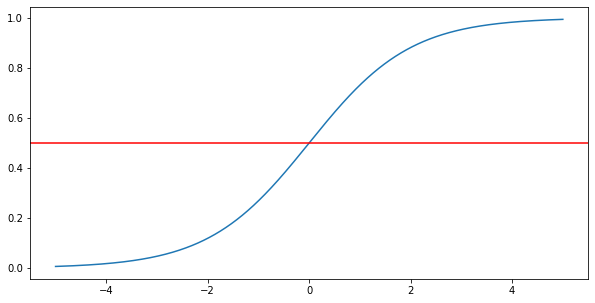

In [15]:
# Creating vectors X and Y
x = np.linspace(-5, 5, 10000)
y = sigmoid(x)
fig = plt.figure(figsize = (10, 5))
# Create the plot
plt.plot(x, y)
# Show the plot
plt.axhline(.5, color="red")
plt.show()

Our logistic regression is going to use this sigmoid functions to generate a prediction between 0 and 1. Can can plug the linear regression equation into the sigmoid function, then our new hypothesis becomes:

$ y = \frac{1}{(1+e^(m*x+b))} $

Where y = probability. 

Note - the mathmatical derivations aren't really super-duper critical. If it is confusing, just ingore it. There's a full derivation and example here: https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-how-do-i-interpret-odds-ratios-in-logistic-regression/

<h2>Real Example - SciKitLearn</h2>

For our first try we can use the diabetes example we've used a bit before, though we've always sidesteped the true target. The outcome value is whether or not someone is diabetic, and all the other variables that are risk factors that we can use to predict if someone will become diabetic. Our aim is to predict, yes or no, will someone develop diabetes based on those risk factors. 

First - one variable. We'll use BMI.

In [16]:
y = np.array(df["Outcome"]).reshape(-1,1)
x = np.array(df["BMI"]).reshape(-1,1)
print(x.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

(768, 1) (768, 1)


<b>ravel()</b> - sometimes you may get a message that says something like "we want the y data in the shape (samples,)". This is obviously a contradiction to what we said to always shape the y as (samples, 1). The easiest way to deal with this is to use the .ravel() function as shown below. The cause is the expectation of data format for whatever you're using, which can vary. If we always make the y array (samples, 1) and then use ravel when needed, that allows us to be consistent and not worry about it much. I'd suggest keeping with this for simplicity. 

In [17]:
md1 = LogisticRegression().fit(X_train,y_train.ravel())
md1Pred = md1.predict(X_test)

score = md1.score(X_test, y_test)
print(score)

0.6259842519685039


66% accuracy. Not bad. We can try with more Xs though...

#### Multiple Logistic Regression

In [18]:
#Get all the X values. 
# I can use the y from above still 
df2 = df.drop(columns={"Outcome"})
x2 = np.array(df2)
x2.shape

(768, 8)

In [19]:
#I'm reusing some varaible names to make my life easier with copy/paste. 
#Make sure you run things in order if you do this. 
X_train, X_test, y_train, y_test = train_test_split(x2, y, test_size=0.33)

md2 = LogisticRegression().fit(X_train,y_train.ravel())
md2Pred = md2.predict(X_test)
score = md2.score(X_test, y_test)
print(score)

0.7480314960629921


c:\Users\atrsy\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


When I ran this the first time, I didn't get an answer, I instead got something along the lines of "failed to converge". This means that the gradient descent process didn't finish, and the algorithm didn't settle on an answer. We will explore this more in the machine learning stuff, for now we can just tell it to set a higher cap on how long it can run. 

In [20]:
md2 = LogisticRegression(max_iter=1000).fit(X_train,y_train.ravel())
md2Pred = md2.predict(X_test)
score = md2.score(X_test, y_test)
print(score)

0.7637795275590551


### Classification Results 

We can demonstrate some results... We'll look into result details more later. 

In [21]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix 
preds = md2.predict(X_test)

In [22]:
print(classification_report(y_test, preds, digits=2))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       166
           1       0.70      0.56      0.62        88

    accuracy                           0.76       254
   macro avg       0.74      0.72      0.72       254
weighted avg       0.76      0.76      0.76       254



In [23]:
print(confusion_matrix(y_test, preds))

[[145  21]
 [ 39  49]]


<AxesSubplot:>

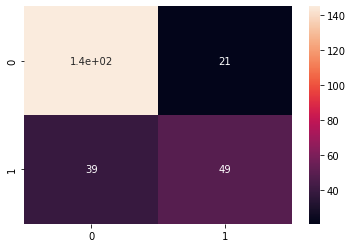

In [24]:
sns.heatmap(confusion_matrix(y_test, preds), annot=True)

In [25]:
print(accuracy_score(y_test, preds)*100)

76.37795275590551


## Exercise - Work Through Titanic

Predict who lives...

In [62]:
#Data
dft = pd.read_csv("data/train.csv")
dft.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [71]:
dft = pd.read_csv("data/train.csv")
dft['Sex'] = dft['Sex'].astype('category')

df3 = dft.drop(columns={'Name','Ticket','Cabin','Age'})
df3 = pd.get_dummies(df3)
df3.head()


,PassengerId,Survived,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,1,0,7.2500,0,1,0,0,1
1,2,1,1,1,0,71.2833,1,0,1,0,0
2,3,1,3,0,0,7.9250,1,0,0,0,1
3,4,1,1,1,0,53.1000,1,0,0,0,1
4,5,0,3,0,0,8.0500,0,1,0,0,1


0.7661016949152543
              precision    recall  f1-score   support

           0       0.84      0.81      0.82       198
           1       0.63      0.68      0.66        97

    accuracy                           0.77       295
   macro avg       0.74      0.74      0.74       295
weighted avg       0.77      0.77      0.77       295



<AxesSubplot:>

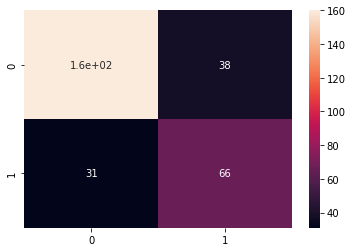

In [75]:
x = np.array(df3.drop(columns='Survived'))
y = np.array(dft['Survived']).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33)

md3 = LogisticRegression(max_iter=1000).fit(X_train,y_train.ravel())
md3Pred = md3.predict(X_test)
score = md3.score(X_test, y_test)
print(score)
preds = md3.predict(X_test)
print(classification_report(y_test, preds, digits=2))
sns.heatmap(confusion_matrix(y_test, preds), annot=True)